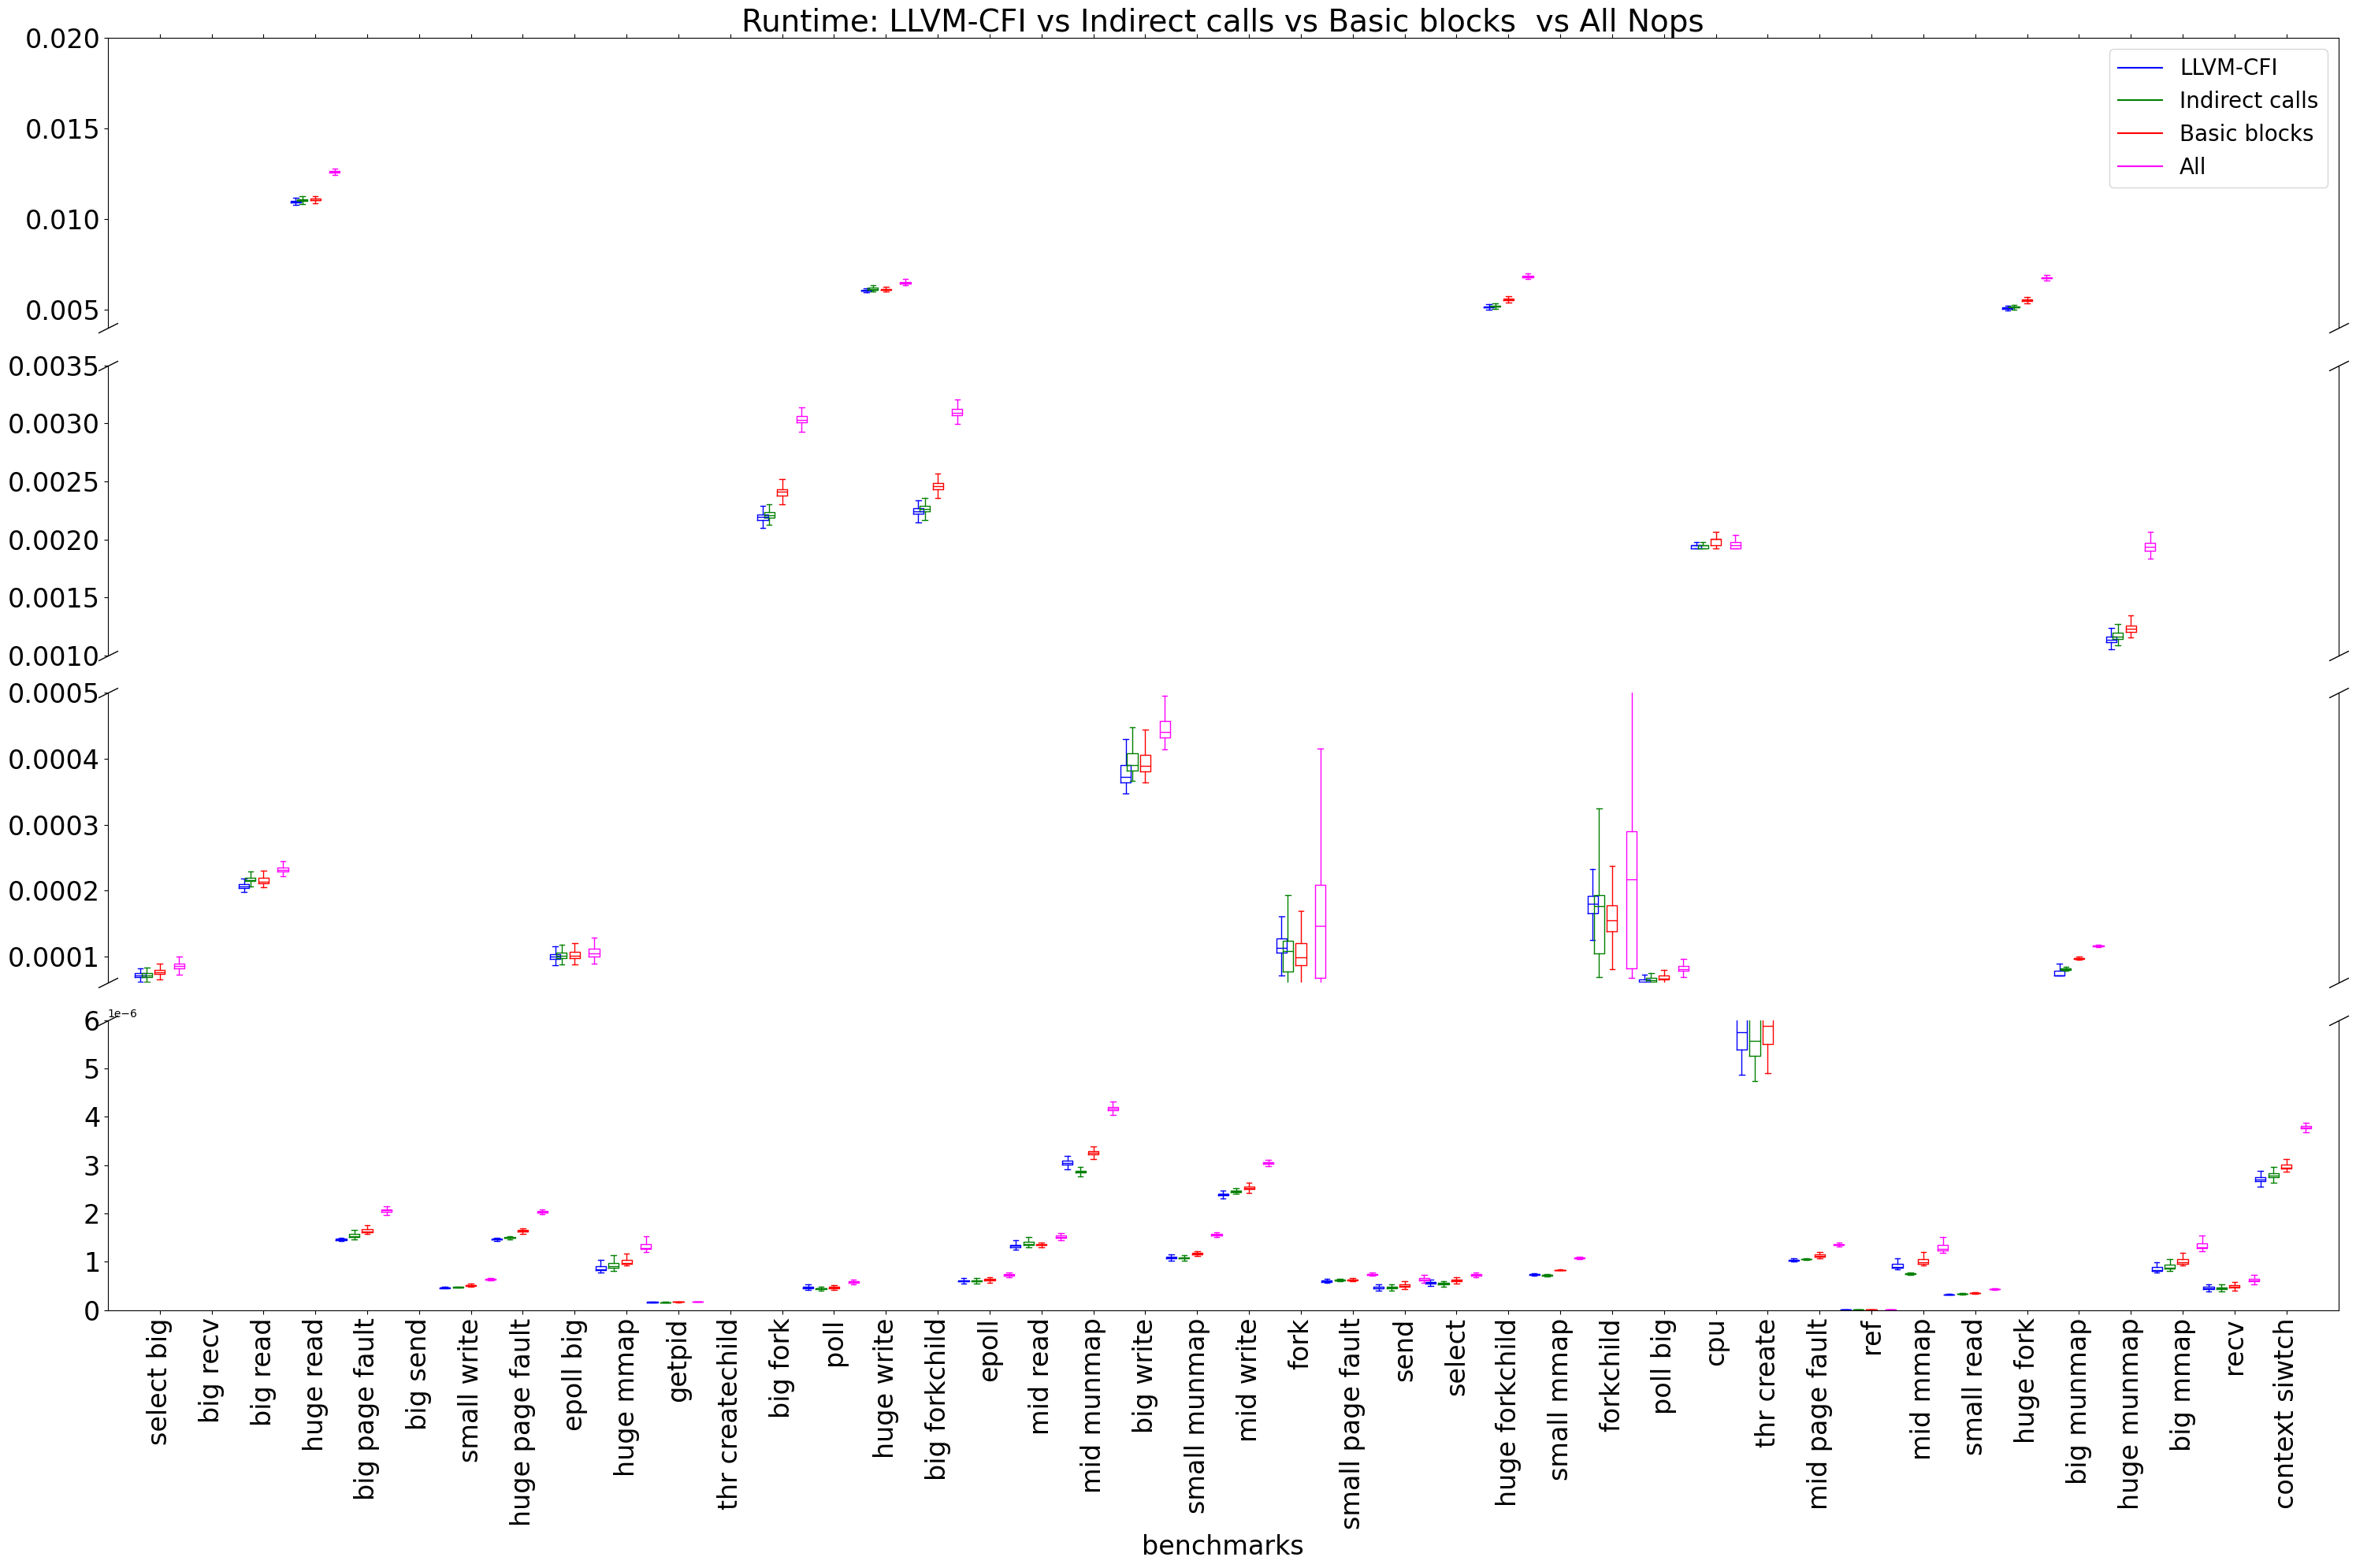

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

from matplotlib.patches import Polygon

fig, (ax4, ax3, ax2, ax1) = plt.subplots(4,1,sharex=True)
dir_path = "/home/mvle/git/github.com/LEBench/RESULT_DIR/nop/all"
labels = []
filenames = []

# get benchmark names from the filenames
for fn in os.listdir(dir_path):
    global labels, filenames
    if os.path.isfile(os.path.join(dir_path, fn)):
        if "bench" in fn:
            filenames.append(fn)
            labels.append(fn.split(".")[1])

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)
    
def getData(dir_path, filenames):
    data = []
    for f1 in filenames:
        for fn in os.listdir(dir_path):
            if os.path.isfile(os.path.join(dir_path, fn)):
                if f1 == fn:
                    f = open(os.path.join(dir_path, fn), "r")
                    line = f.readlines()
                    line = line[0].split(" ")[:-1]
                    line = [float(x) for x in line]
                    data.append(line)
    return data

vandata = getData("/home/mvle/git/github.com/LEBench/RESULT_DIR/perf/lebench/llvmcfi", filenames)
indcalldata = getData("/home/mvle/git/github.com/LEBench/RESULT_DIR/nop/indcall/2", filenames)
bbdata = getData("/home/mvle/git/github.com/LEBench/RESULT_DIR/nop/bb", filenames)
insdata = getData("/home/mvle/git/github.com/LEBench/RESULT_DIR/nop/all", filenames)
data = [vandata,indcalldata,bbdata,insdata]

fig.subplots_adjust(hspace=0.3)  # adjust space between axes
fig.set_size_inches(30, 20)

ax1.set_ylim([0,0.000006])
ax1.set_xlim([-4, len(vandata)*4])

ax2.set_ylim([0.00006,0.0005])
ax2.set_xlim([-4, len(vandata)*4])

ax3.set_ylim([0.0010,0.0035])
ax3.set_xlim([-4, len(vandata)*4])

ax4.set_ylim([0.004,0.02])
ax4.set_xlim([-4, len(vandata)*4])

# Set ticks labels for x-axis
#ax.set_xticklabels(labels, rotation='vertical', fontsize=18)
vg = ax1.boxplot(vandata, 0, positions=np.array(range(len(vandata)))*4.0-2, sym="", widths=0.8)
indcallg = ax1.boxplot(indcalldata, 0, positions=np.array(range(len(indcalldata)))*4.0-1.0, sym="", widths=0.8)
bbg = ax1.boxplot(bbdata, 0, positions=np.array(range(len(bbdata)))*4.0+0, sym="", widths=0.8)
insg = ax1.boxplot(insdata, 0, positions=np.array(range(len(insdata)))*4.0+1.5, sym="", widths=0.8)

vg1 = ax2.boxplot(vandata, 0, positions=np.array(range(len(vandata)))*4.0-1.5, sym="", widths=0.8)
indcallg1 = ax2.boxplot(indcalldata, 0, positions=np.array(range(len(indcalldata)))*4.0-1.0, sym="", widths=0.8)
bbg1 = ax2.boxplot(bbdata, 0, positions=np.array(range(len(bbdata)))*4.0+0, sym="", widths=0.8)
insg1 = ax2.boxplot(insdata, 0, positions=np.array(range(len(insdata)))*4.0+1.5, sym="", widths=0.8)

vg2 = ax3.boxplot(vandata, 0, positions=np.array(range(len(vandata)))*4.0-1.5, sym="", widths=0.8)
indcallg2 = ax3.boxplot(indcalldata, 0, positions=np.array(range(len(indcalldata)))*4.0-1.0, sym="", widths=0.8)
bbg2 = ax3.boxplot(bbdata, 0, positions=np.array(range(len(bbdata)))*4.0+0, sym="", widths=0.8)
insg2 = ax3.boxplot(insdata, 0, positions=np.array(range(len(insdata)))*4.0+1.5, sym="", widths=0.8)

vg3 = ax4.boxplot(vandata, 0, positions=np.array(range(len(vandata)))*4.0-1.5, sym="", widths=0.8)
indcallg3 = ax4.boxplot(indcalldata, 0, positions=np.array(range(len(indcalldata)))*4.0-1.0, sym="", widths=0.8)
bbg3 = ax4.boxplot(bbdata, 0, positions=np.array(range(len(bbdata)))*4.0+0, sym="", widths=0.8)
insg3 = ax4.boxplot(insdata, 0, positions=np.array(range(len(insdata)))*4.0+1.5, sym="", widths=0.8)

set_box_color(vg, 'blue')
set_box_color(indcallg, 'green')
set_box_color(bbg, 'red')
set_box_color(insg, 'magenta')

set_box_color(vg1, 'blue')
set_box_color(indcallg1, 'green')
set_box_color(bbg1, 'red')
set_box_color(insg1, 'magenta')

set_box_color(vg2, 'blue')
set_box_color(indcallg2, 'green')
set_box_color(bbg2, 'red')
set_box_color(insg2, 'magenta')

set_box_color(vg3, 'blue')
set_box_color(indcallg3, 'green')
set_box_color(bbg3, 'red')
set_box_color(insg3, 'magenta')

# hide the spines between ax and ax2
ax4.spines.bottom.set_visible(False)
ax4.xaxis.tick_top()

ax3.spines.bottom.set_visible(False)
ax3.spines.top.set_visible(False)
ax3.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False  # labels along the bottom edge are off)
)

ax2.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax2.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False  # labels along the bottom edge are off)
)

ax1.spines.top.set_visible(False)
ax1.xaxis.tick_bottom()

# Now, let's turn towards the cut-out slanted lines.
# We create line objects in axes coordinates, in which (0,0), (0,1),
# (1,0), and (1,1) are the four corners of the axes.
# The slanted lines themselves are markers at those locations, such that the
# lines keep their angle and position, independent of the axes size or scale
# Finally, we need to disable clipping.

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=18,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot(0, 1, 1, 1, transform=ax1.transAxes, **kwargs)
ax2.plot(0, 0, 1, 0, 0, 1, 1, 1, transform=ax2.transAxes, **kwargs)
ax3.plot(0, 0, 1, 0, 0, 1, 1, 1, transform=ax3.transAxes, **kwargs)
ax4.plot(0, 0, 1, 0, transform=ax4.transAxes, **kwargs)

# draw temporary red and blue lines and use them to create a legend
ax4.plot([], c='blue', label='LLVM-CFI')
ax4.plot([], c='green', label='Indirect calls')
ax4.plot([], c='red', label='Basic blocks')
ax4.plot([], c='magenta', label='All')
ax4.legend(fontsize=20)

plt.xlabel("benchmarks", fontsize=24)
plt.yticks(fontsize=24)
ax2.yaxis.set_tick_params(labelsize=24)
ax3.yaxis.set_tick_params(labelsize=24)
ax4.yaxis.set_tick_params(labelsize=24)
plt.xticks(range(0, len(labels) * 4, 4), labels, rotation="vertical", fontsize=24)
ax4.set_title("Runtime: LLVM-CFI vs Indirect calls vs Basic blocks  vs All Nops", fontsize=28)

plt.tight_layout()
plt.savefig('nop.png')
plt.show()


<Figure size 7680x5760 with 0 Axes>

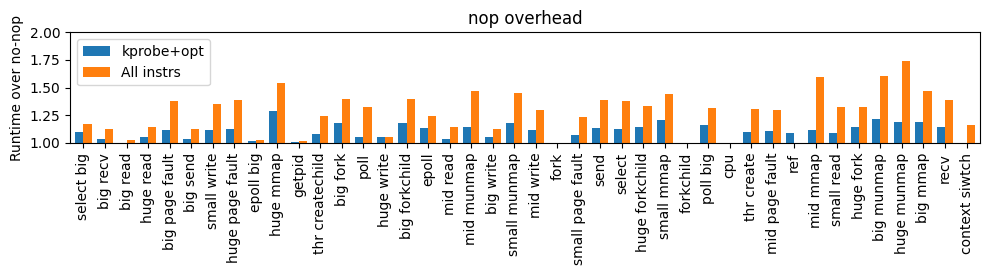

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import os
import statistics
import matplotlib.ticker as ticker 
import pandas as pd 

#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('retina')

from matplotlib.patches import Polygon
#import matplotlib
#matplotlib.use('webagg')

#fig, ax = plt.subplots()
dir_path = "/home/mvle/git/github.com/LEBench/RESULT_DIR/perf/lebench/vanilla/2"
labels = []
filenames = []

def getkbest(data, fn):
    INPRECISION = 0.05
    K = 5

    k_closest = []
    for i in range(1, len(data)):
        diff = data[i] - data[i-1]
        if diff / data[i-0] > INPRECISION:
            k_closest = []
        else:
            k_closest.append(data[i-1])
        if len(k_closest) == K:
            break
    if len(k_closest) != K:
        print("only found the {} closest\n".format(len(k_closest)))
    #print(fn + str(k_closest[0]))
    return k_closest[0]

# get benchmark names from the filenames
for fn in os.listdir(dir_path):
    global labels, filenames
    if os.path.isfile(os.path.join(dir_path, fn)):
        if "bench" in fn:
            filenames.append(fn)
            labels.append(fn.split(".")[1])
   
def getData(dir_path, filenames):
    data = []
    for f1 in filenames:
        for fn in os.listdir(dir_path):
            if os.path.isfile(os.path.join(dir_path, fn)):
                if f1 == fn:
                    f = open(os.path.join(dir_path, fn), "r")
                    line = f.readlines()
                    line = line[0].split(" ")[:-1]
                    line = [float(x) for x in line]
                    data.append(line)
    return data

vandata = getData("/home/mvle/git/github.com/LEBench/RESULT_DIR/perf/lebench/llvmcfi/2", filenames)
indcalldata = getData("/home/mvle/git/github.com/LEBench/RESULT_DIR/nop/indcall/2", filenames)
bbdata = getData("/home/mvle/git/github.com/LEBench/RESULT_DIR/nop/bb", filenames)
insdata = getData("/home/mvle/git/github.com/LEBench/RESULT_DIR/nop/all", filenames)
kprobeoptdata = getData("/home/mvle/git/github.com/LEBench/RESULT_DIR/nop/kprobeopt/2", filenames)

data = {}
data['name'] = labels
data["no-nop"] = [] #LLVM-CFI
data["IndirectCall"] = []
data["BasicBlock"] = []
data["kprobe+opt"] = []
data["All instrs"] = []
for i in range(0, len(filenames)):
    #basemedian = statistics.median(vandata[i])
    #indmedian = statistics.median(indcalldata[i])
    #bbmedian = statistics.median(bbdata[i])
    #insmedian = statistics.median(insdata[i])
    #kprobeoptmedian = statistics.median(kprobeoptdata[i])
    #data["no-nop"].append(basemedian/basemedian)
    #data["IndirectCall"].append(indmedian/basemedian)
    #data["BasicBlock"].append(bbmedian/basemedian)
    #data["All instrs"].append(insmedian/basemedian)
    #data["kprobe+opt"].append(kprobeoptmedian/basemedian)

    basekbest = getkbest(vandata[i], filenames[i])
    indkbest = getkbest(indcalldata[i], filenames[i])
    bbkbest = getkbest(bbdata[i], filenames[i])
    inskbest = getkbest(insdata[i], filenames[i])
    kprobeoptkbest = getkbest(kprobeoptdata[i], filenames[i])
    data["no-nop"].append(basekbest/basekbest)
    data["IndirectCall"].append(indkbest/basekbest)
    data["BasicBlock"].append(bbkbest/basekbest)
    data["All instrs"].append(inskbest/basekbest)
    data["kprobe+opt"].append(kprobeoptkbest/basekbest)
df = pd.DataFrame(data)


#fig.set_size_inches(30, 20)
#ax.set_ylim([0,0.2])
plt.figure(dpi=1200)

ax = df.plot(x="name", y=["kprobe+opt", "All instrs"], kind="bar", width=0.75, title="nop overhead", figsize=(10,2.85)) 

ax.set_ylabel("Runtime over no-nop")
ax.set_xlabel("")
ax.set_ylim([1, 2])
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.25))

#plt.yticks(fontsize=24)
#plt.xticks(range(0, len(labels) * 4, 4), labels, rotation="vertical", fontsize=24)

plt.tight_layout()
plt.savefig('nop.png', dpi=300)
plt.show()

<Figure size 1920x1440 with 0 Axes>

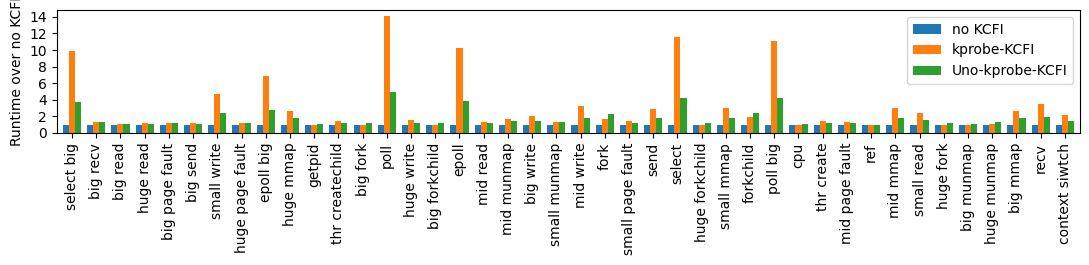

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os
import statistics
import matplotlib.ticker as ticker 
import pandas as pd 

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

#fig, ax = plt.subplots()
dir_path = "/home/mvle/git/github.com/LEBench/RESULT_DIR/perf/lebench/vanilla/2"
labels = []
filenames = []

# get benchmark names from the filenames
for fn in os.listdir(dir_path):
    global labels, filenames
    if os.path.isfile(os.path.join(dir_path, fn)):
        if "bench" in fn:
            filenames.append(fn)
            labels.append(fn.split(".")[1])

def getData(dir_path, filenames):
    data = []
    for f1 in filenames:
        for fn in os.listdir(dir_path):
            if os.path.isfile(os.path.join(dir_path, fn)):
                if f1 == fn:
                    f = open(os.path.join(dir_path, fn), "r")
                    line = f.readlines()
                    line = line[0].split(" ")[:-1]
                    line = [float(x) for x in line]
                    data.append(line)
    return data

vandata = getData("/home/mvle/git/github.com/LEBench/RESULT_DIR/perf/lebench/vanilla/2", filenames)
llvm = getData("/home/mvle/git/github.com/LEBench/RESULT_DIR/perf/lebench/llvmcfi/2", filenames)
ekcfi = getData("/home/mvle/git/github.com/LEBench/RESULT_DIR/perf/lebench/ekcfi", filenames)
perproc = getData("/home/mvle/git/github.com/LEBench/RESULT_DIR/perf/lebench/ekcfi_perproc", filenames)
callsite = getData("/home/mvle/git/github.com/LEBench/RESULT_DIR/perf/lebench/ekcfi_callsite", filenames)
callsite_opt = getData("/home/mvle/git/github.com/LEBench/RESULT_DIR/perf/lebench/ekcfi_callsite_nodosyscall64", filenames)
kprobeopt = getData("/home/mvle/git/github.com/LEBench/RESULT_DIR/perf/lebench/kprobeopt/2", filenames)
kprobe = getData("/home/mvle/git/github.com/LEBench/RESULT_DIR/perf/lebench/kprobe/1", filenames)
#data = [vandata,llvm,ekcfi,callsite]

data = {}
data['name'] = labels
data["no KCFI"] = []
data["LLVM-CFI"] = []
data["eKCFI"] = []
data["eKCFI+Proc"] = []
data["eKCFI+Callsite"] = []
data["eKCFI+Callsite+opt"] = []
data["kprobe-KCFI"] = []
data["Uno-kprobe-KCFI"] = []
for i in range(0, len(filenames)):
    basemedian = statistics.median(vandata[i])
    llvmmedian = statistics.median(llvm[i])
    ekcfimedian = statistics.median(ekcfi[i])
    ekcfiprocmedian = statistics.median(perproc[i])
    callsitemedian = statistics.median(callsite[i])
    callsiteoptmedian = statistics.median(callsite_opt[i])
    kprobemedian = statistics.median(kprobe[i])
    kprobeoptmedian = statistics.median(kprobeopt[i])
    data["no KCFI"].append(basemedian/basemedian)
    data["LLVM-CFI"].append(llvmmedian/basemedian)
    data["eKCFI"].append(ekcfimedian/basemedian)
    data["eKCFI+Proc"].append(ekcfiprocmedian/basemedian)
    data["eKCFI+Callsite"].append(callsitemedian/basemedian)
    data["eKCFI+Callsite+opt"].append(callsiteoptmedian/basemedian)
    data["kprobe-KCFI"].append(kprobemedian/basemedian)
    data["Uno-kprobe-KCFI"].append(kprobeoptmedian/basemedian)

    #basekbest = getkbest(vandata[i], filenames[i])
    #llvmkbest = getkbest(llvm[i], filenames[i])
    #ekcfikbest = getkbest(ekcfi[i], filenames[i])
    #ekcfiprockbest = getkbest(perproc[i], filenames[i])
    #callsitekbest = getkbest(callsite[i], filenames[i])
    #callsiteoptkbest = getkbest(callsite_opt[i], filenames[i])
    #kprobekbest = getkbest(kprobe[i], filenames[i])
    #kprobeoptkbest = getkbest(kprobeopt[i], filenames[i])
    #data["no KCFI"].append(basekbest/basekbest)
    #data["LLVM-CFI"].append(llvmkbest/basekbest)
    #data["eKCFI"].append(ekcfikbest/basekbest)
    #data["eKCFI+Proc"].append(ekcfiprockbest/basekbest)
    #data["eKCFI+Callsite"].append(callsitekbest/basekbest)
    #data["eKCFI+Callsite+opt"].append(callsiteoptkbest/basekbest)
    #data["kprobe-KCFI"].append(kprobekbest/basekbest)
    #data["kprobe+opt-KCFI"].append(kprobeoptkbest/basekbest)
df = pd.DataFrame(data)

plt.figure(dpi=300)

#ax = df.plot(x="name", y=["Vanilla", "LLVM-CFI", "eKCFI", "eKCFI+Proc", "eKCFI+Callsite"], kind="bar", width=0.75, title="Overhead of LEBench Microbenchmark", figsize=(11,6)) 
ax = df.plot(x="name", y=["no KCFI", "kprobe-KCFI", "Uno-kprobe-KCFI"], kind="bar", width=0.75, figsize=(11,2.75)) 

ax.set_ylabel("Runtime over no KCFI")
ax.set_xlabel("")
ax.yaxis.set_major_locator(ticker.MultipleLocator(2)) 

#plt.xticks(rotation=60)
plt.tight_layout()
plt.savefig('micro.png', dpi=300)
plt.show()

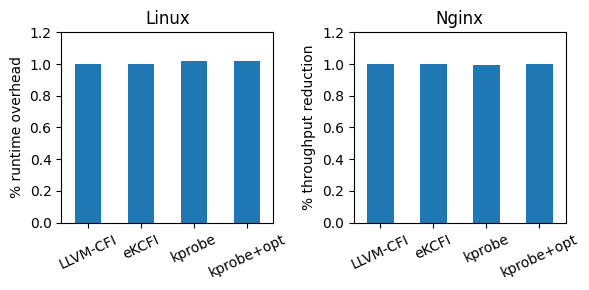

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd 

import matplotlib.ticker as ticker 
from matplotlib.patches import Polygon

fig, (ax1, ax2) = plt.subplots(1, 2)

dir_path = "/home/mvle/git/github.com/LEBench/RESULT_DIR/6.3.6van/6"
labels = ["Linux", "Apache"]
filenames = []

df = {
    #"name": ["LLVM-CFI", "eKCFI", "eKCFI+Callsite"],
    #"Linux": [51/51, 51/51, 54/51],
    #"nginx": [20101 / 20122, 20124/20122, 20096/20122]
    "name": ["LLVM-CFI", "eKCFI", "kprobe", "kprobe+opt"],
    "Linux": [51/51, 51/51, 52/51, 52/51],
    "nginx": [20101 / 20122, 20124/20122, 20041/20122, 20104/20122]
}
df = pd.DataFrame(df)

axlinux = df.plot(ax=ax1, x="name", y=["Linux"], kind="bar", title="Linux", rot=25, legend=False, figsize=(6,3)) 
axnginx = df.plot(ax=ax2, x="name", y=["nginx"], kind="bar", title="Nginx", rot=25, legend=False) 

axlinux.set_ylabel("% runtime overhead")
axlinux.set_ylim([0, 1.2])
axnginx.set_ylim([0, 1.2])
axlinux.set_xlabel("")
axnginx.set_xlabel("")
axnginx.set_ylabel("% throughput reduction")
axlinux.yaxis.set_major_locator(ticker.MultipleLocator(0.2)) 
axnginx.yaxis.set_major_locator(ticker.MultipleLocator(0.2)) 

plt.tight_layout()
plt.savefig('macro.png', dpi=300)
plt.show()

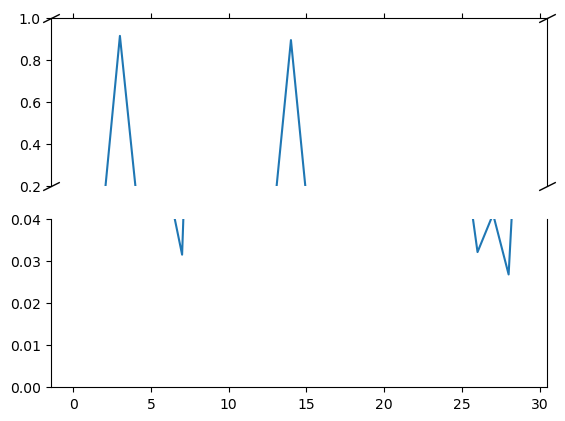

In [43]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(19680801)

pts = np.random.rand(30)*.2
# Now let's make two outlier points which are far away from everything.
pts[[3, 14]] += .8

# If we were to simply plot pts, we'd lose most of the interesting
# details due to the outliers. So let's 'break' or 'cut-out' the y-axis
# into two portions - use the top (ax1) for the outliers, and the bottom
# (ax2) for the details of the majority of our data
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.2)  # adjust space between axes

# plot the same data on both axes
ax1.plot(pts)
ax2.plot(pts)

# zoom-in / limit the view to different portions of the data
ax1.set_ylim(.2, 1.)  # outliers only
ax2.set_ylim(0, .04)  # most of the data

# hide the spines between ax and ax2
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# Now, let's turn towards the cut-out slanted lines.
# We create line objects in axes coordinates, in which (0,0), (0,1),
# (1,0), and (1,1) are the four corners of the axes.
# The slanted lines themselves are markers at those locations, such that the
# lines keep their angle and position, independent of the axes size or scale
# Finally, we need to disable clipping.

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
#ax1.plot([1, 0], [0, 0], transform=ax1.transAxes, **kwargs)
#ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
ax1.plot(0,0, 1,1, 0,1, 1,0, transform=ax1.transAxes, **kwargs)
#ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)


plt.show()